### ***Project Overview***

*Bati Bank is partnering with an upcoming successful eCommerce company to enable a buy-now-pay-later service - to provide customers with the ability to buy products by credit if they qualify for the service. You are assigned a project to create a Credit Scoring Model using the data provided by the eCommerce platform.*

#### ***1. Data Collection***

In [1]:
## Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import data
df = pd.read_csv('../data/data.csv')

In [3]:
## View the structure of the data
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
## The shape of the data
df.shape

(95662, 16)

In [5]:
## General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

***OBSERVATION***

*As It can be seen from the General information there are no missing values and the 'TransactionStartTime' datatype is represented incorrectly.*

#### ***2. Exploratory Data Analysis***

In [6]:
## Since the currency code and country code are same across all rows we have to remove them.
df.drop(columns=['CurrencyCode', 'CountryCode'], inplace=True)

In [7]:
## General Statistics
df.describe()

,Amount,Value,PricingStrategy,FraudResult
count,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,6.717846e+03,9.900584e+03,2.255974,0.002018
std,1.233068e+05,1.231221e+05,0.732924,0.044872
min,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,2.800000e+03,5.000000e+03,2.000000,0.000000
max,9.880000e+06,9.880000e+06,4.000000,1.000000


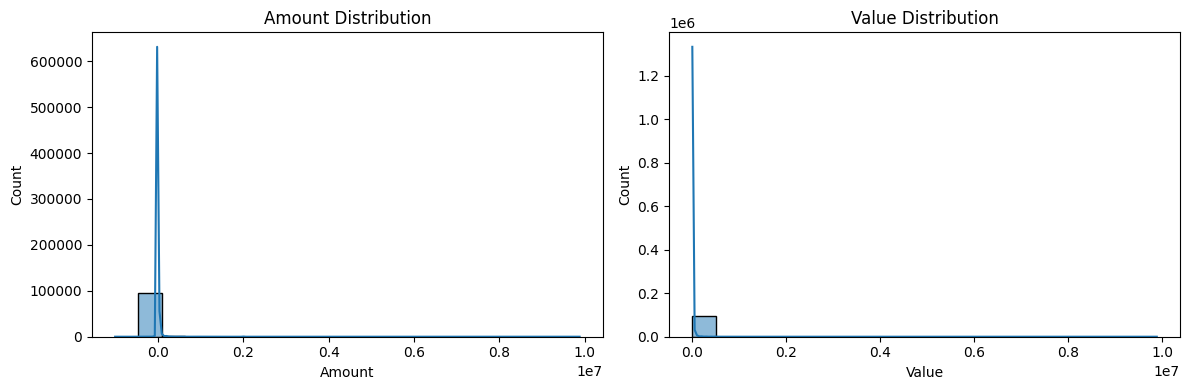

In [8]:

fig,axs= plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=df, x=df['Value'], bins=20, kde=True, ax=axs[1])
sns.histplot(data=df,x=df['Amount'], bins=20, kde=True, ax=axs[0])
axs[0].set_title("Amount Distribution")
axs[1].set_title("Value Distribution")

plt.tight_layout()
plt.show()

***OBSERVATION***

*Both Amount and Value columns distribution are right skewed which implies that the majority of the values in these columns are clustered at the lower end, with a long tail extending towards higher values. This suggests that most of the observations are relatively small, but there are a few larger values that are pulling the mean towards the right. The right tail could indicate the presence of outliers or extreme values*

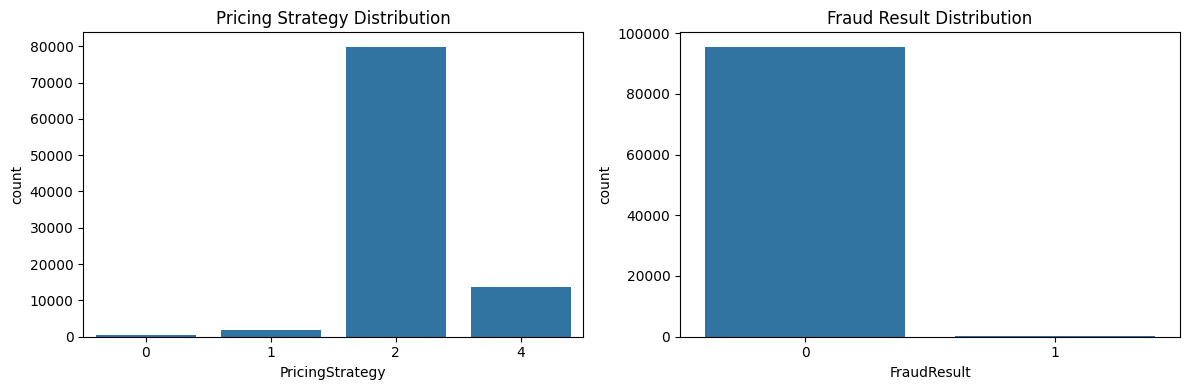

In [9]:
fig,axs= plt.subplots(1,2,figsize=(12,4))
sns.countplot(data=df, x=df['PricingStrategy'], ax=axs[0])
sns.countplot(data=df, x=df['FraudResult'], ax=axs[1])
axs[0].set_title("Pricing Strategy Distribution")
axs[1].set_title("Fraud Result Distribution")
plt.tight_layout()
plt.show()

***OBSERVATION***

1. *Strategy Type 2 is the most common price strategy among providers, which might suggest that it’s the most preferred or widely used pricing approach.*

2. *Most of the transactions are non-fraudulent, there are insignificant amount of fraud.*

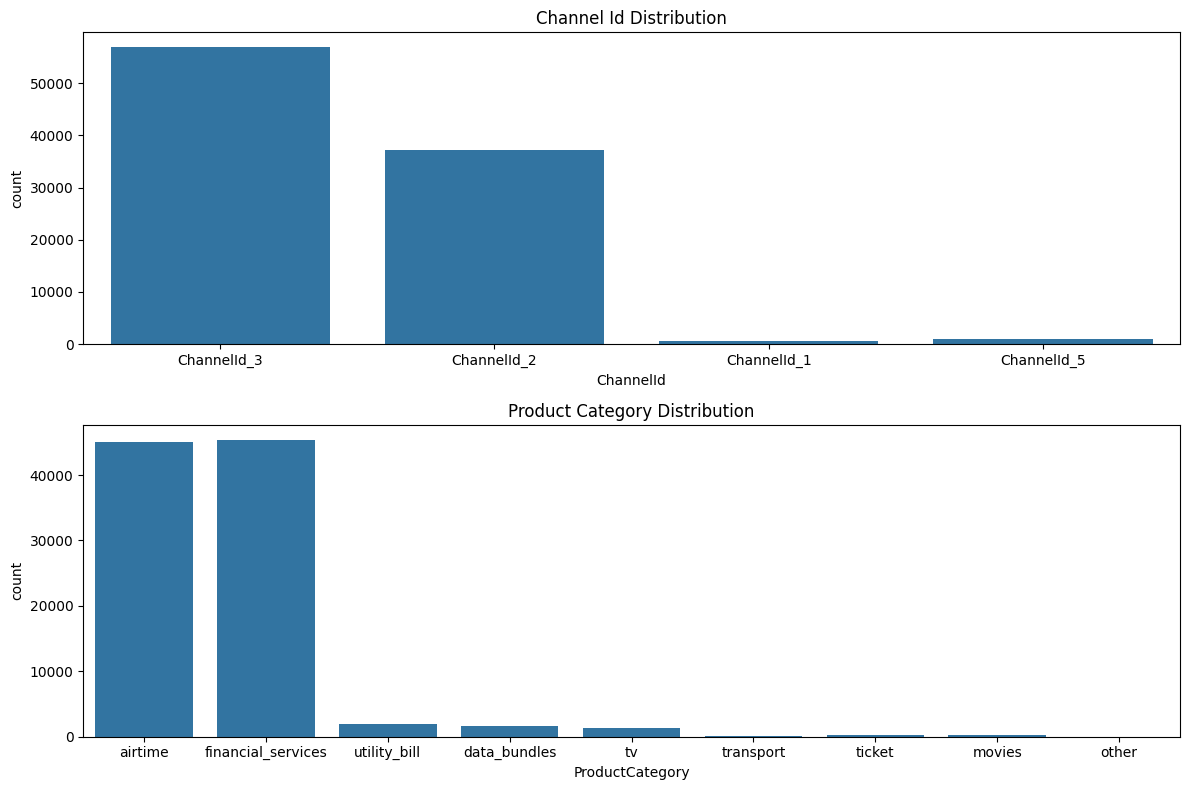

In [10]:
fig,axs= plt.subplots(2,1,figsize=(12,8))
sns.countplot(data=df, x=df['ChannelId'], ax=axs[0])
sns.countplot(data=df, x=df['ProductCategory'], ax=axs[1])
axs[0].set_title("Channel Id Distribution")
axs[1].set_title("Product Category Distribution")
plt.tight_layout()
plt.show()

***OBSERVATION***

1. *ChannelId3 and ChannelId2 are the most popular payment channels among users, suggesting that customers have a preference for these channels when completing transactions*
2. *Airtime and Financial Services are the primary product categories purchased by customers, which reflects a trend in what customers value and purchase most frequently*

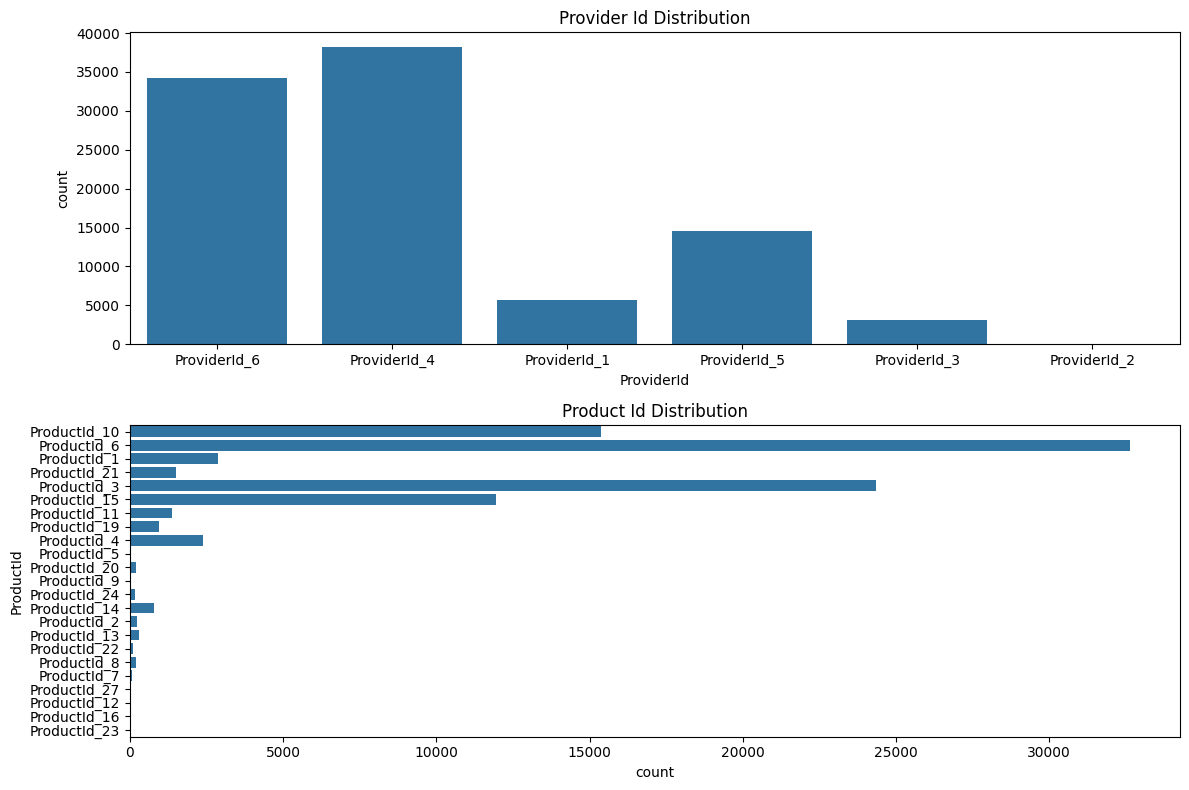

In [11]:
fig,axs= plt.subplots(2,1,figsize=(12,8))
sns.countplot(data=df, x=df['ProviderId'], ax=axs[0])
sns.countplot(data=df, y=df['ProductId'], ax=axs[1])
axs[0].set_title("Provider Id Distribution")
axs[1].set_title("Product Id Distribution")
plt.tight_layout()
plt.show()

***OBSERVATION***

*Providers 4 and 6 dominate the customer base, suggesting that these providers are either more popular, offer better services, or are favored for specific reasons*

##### ***Correlation Analysis***

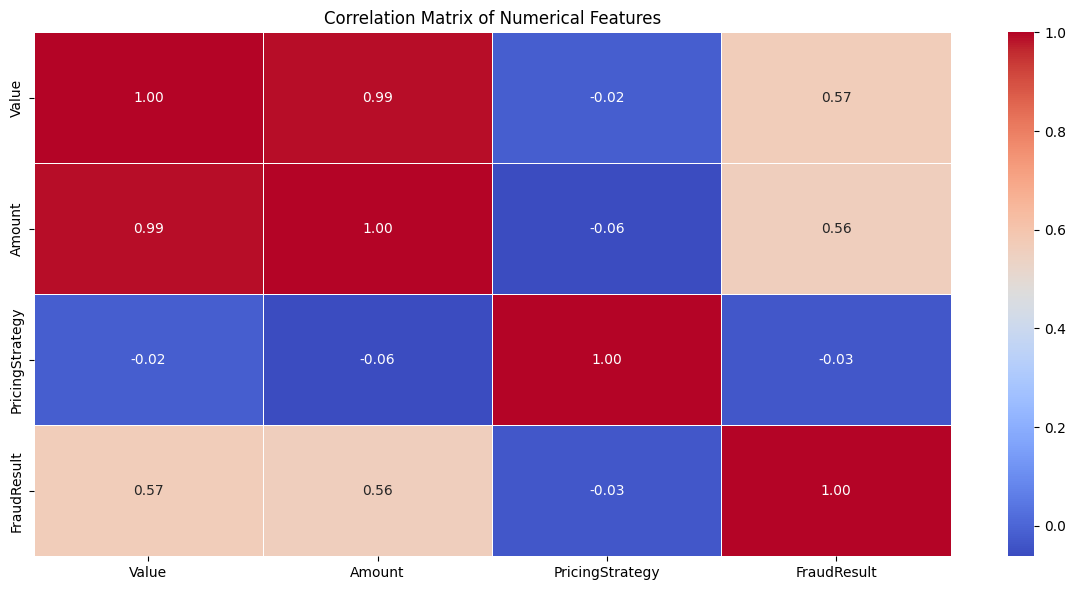

In [12]:
## Correlation between numerical features

columns = ['Value','Amount','PricingStrategy','FraudResult']
corr = df[columns].corr()

 # Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')

plt.tight_layout()
plt.show()

##### ***Outlier Detection***

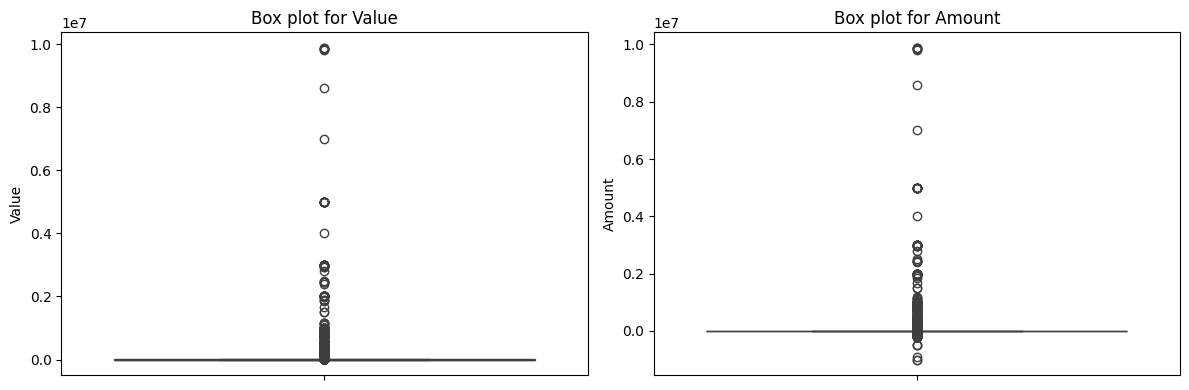

In [13]:
## Boxplot to detect outliers
fig,axs= plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=df, y='Value',ax=axs[0])
sns.boxplot(data=df, y='Amount',ax=axs[1])
axs[0].set_title("Box plot for Value")
axs[1].set_title("Box plot for Amount")

plt.tight_layout()
plt.show()

***OBSERVATION***

*Both Value and Amount features contain outliers*

In [14]:
## Handling outliers

def handling_outliers(df):
    columns = ['Value', 'Amount']
    for i in columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df[i] = np.where((df[i] < lower_bound) | (df[i]>upper_bound), df[i].median(), df[i])

    return df

In [15]:
handling_outliers(df)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,1000.0,1000.0,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000.0,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000.0,2019-02-13T10:01:10Z,2,0


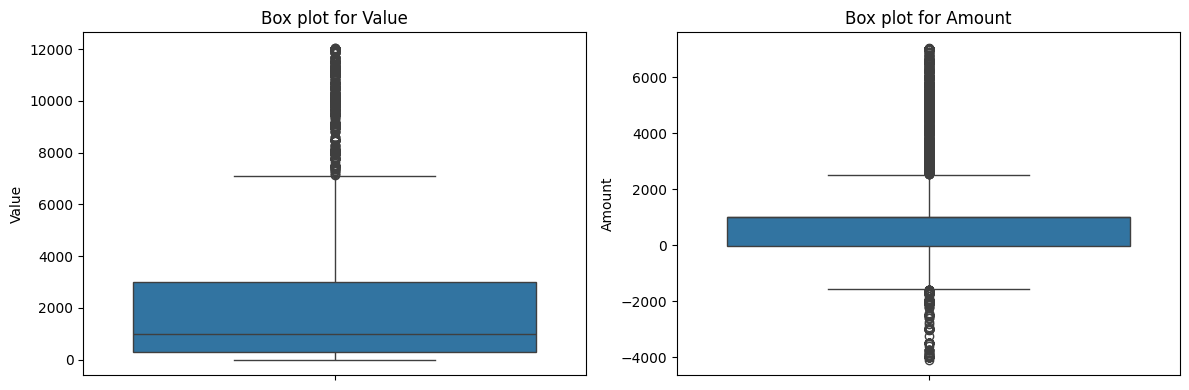

In [16]:
## Boxplot to detect outliers
fig,axs= plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=df, y='Value',ax=axs[0])
sns.boxplot(data=df, y='Amount',ax=axs[1])
axs[0].set_title("Box plot for Value")
axs[1].set_title("Box plot for Amount")

plt.tight_layout()
plt.show()

In [17]:
df.to_csv('cleaned_data.csv', index=False)